# News Categorization on Coded Text

In [1]:
# Import Necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import os

## Load and Prepare the Data

In [2]:
# Load Data
englishDataFrame = pd.read_csv("DataSets/News Articles (English).csv", encoding="utf-8", skiprows=0, nrows=1750)
banglaDataFrame = pd.read_csv("DataSets/News Articles (Bangla).csv", encoding="utf-8", skiprows=0, nrows=1750)
hindiDataFrame = pd.read_csv("DataSets/News Articles (Hindi).csv", encoding="utf-8", skiprows=0, nrows=1750)
dataFrame = pd.concat([englishDataFrame, banglaDataFrame, hindiDataFrame], ignore_index=True)

# Suffle Data
dataFrame = sklearn.utils.shuffle(dataFrame)

# Print Data
dataFrame.head()

,Category,Title,URL,Text
1996,Entertainment,সাবিনা ইয়াসমীনের নতুন দুই গান,https://www.prothomalo.com/entertainment/artic...,বরেণ্য গায়িকা সাবিনা ইয়াসমীনকে এখন সেভাবে নতুন...
3427,Politics,বর্ষপূর্তিতে ৩ লক্ষ্য সামনে রেখে চাঙা হচ্ছে জা...,http://www.banglatribune.com/politics/news/566...,সরকারবিরোধী জোট—জাতীয় ঐক্যফ্রন্টের একবছর পূর্...
2629,Sports,"শফিউল–আল আমিন ফিরলেন, কিন্তু মোস্তাফিজ?",https://www.prothomalo.com/sports/article/1623...,ভারতীয় ব্যাটসম্যানদের আটকাতে ভালো করতে হতো বা...
5093,Science & Tech,Vodafone idea के इन प्लान पर हर रोज मिलेगा अति...,https://www.jansatta.com/technology-news/vodaf...,टेलीकॉम कंपनी वोडाफोन-आइडिया ने अपने ग्राहकों ...
1404,Sports,Faraz Gold Cup: Southeast University cavort to...,https://en.prothomalo.com/sports/news/203174/F...,Southeast University reached final of United G...


In [3]:
# Associate Category Names with Index and Save It in a new Column "categoryId"
dataFrame["categoryId"] = dataFrame["Category"].factorize()[0]

# For the Category IDs Create a New Dataframe "categoryIdDataFrame"
categoryIdDataFrame = dataFrame[["Category", "categoryId"]].drop_duplicates().sort_values("categoryId")

# Create a Dictionary to Easily Convert Category Names into categoryIds and Vice-versa
categoryToId = dict(categoryIdDataFrame.values)
idToCategory = dict(categoryIdDataFrame[["categoryId", "Category"]].values)

# Group the Dataframe by Categories and Count the Nnumber of News Articles
dataFrame.groupby("Category").categoryId.count()

Category
Economy           1050
Entertainment     1050
Politics          1050
Science & Tech    1050
Sports            1050
Name: categoryId, dtype: int64

## Generate Numerical Features Using TFIDF from News Text's Words
#### Generate Unigram, Bigram and Trigram Features Using TFIDF Vectorizer.

In [4]:
# ngram_range=(1, 3) - Generates Unigram, Bigram and Trigram
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDFVectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 3), stop_words='english')

# Generate Features
features = TFIDFVectorizer.fit_transform(dataFrame.Text).toarray()

# Store The Category of the News Articles in "labels"
labels = dataFrame.categoryId

# View Generated Features (Unigram, Bigram and Trigram)
np.array(TFIDFVectorizer.get_feature_names()).tolist()[1000:1250]

['46 रन',
 '47',
 '473',
 '473 64',
 '473 64 billion',
 '48',
 '48 hours',
 '48 समय',
 '48 सल',
 '486',
 '487',
 '48mp',
 '48th',
 '49',
 '49 पय',
 '490',
 '490 पय',
 '493',
 '497',
 '498',
 '499',
 '499 पए',
 '499 पय',
 '4g',
 '4gb',
 '4gb ram',
 '4k',
 '4th',
 '4क',
 '4ज',
 '4ज टवर',
 '50',
 '50 000',
 '50 000 पय',
 '50 50',
 '50 50 पर',
 '50 922',
 '50 922 कर',
 '50 billion',
 '50 cent',
 '50 million',
 '50 overs',
 '50 percent',
 '50 years',
 '50 कर',
 '50 कर मच',
 '50 टर',
 '50 पए',
 '50 पय',
 '50 पय कर',
 '50 पय तय',
 '50 पर',
 '50 रत',
 '50 रत शत',
 '50 सद',
 '50 हज',
 '50 हज कर',
 '50 हज पए',
 '50 हज पय',
 '500',
 '500 000',
 '500 million',
 '500 कर',
 '500 पए',
 '500 पय',
 '5000',
 '500mah',
 '502',
 '50th',
 '50th anniversary',
 '50व',
 '51',
 '51 billion',
 '51 रन',
 '512',
 '512gb',
 '52',
 '53',
 '53 billion',
 '54',
 '54 और',
 '54 और 44',
 '54 यक',
 '54 रन',
 '540',
 '55',
 '550',
 '555',
 '56',
 '56 एनस',
 '56 एनस 54',
 '57',
 '58',
 '58 million',
 '580',
 '59',
 '59 रन'

## Model Training and Accuracy Calculation
#### We will Try 5 Different Classification Models on the Data:
    Logistic Regression
    Random Forest Classifier
    Naive Bayes
    Stochastic Gradient Descent (SGD) Classifier
    Multilayer Perceptron (MLP) Classifier (Adam Solver)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver="lbfgs"),
    SGDClassifier(loss="log"),
    MLPClassifier(solver="adam")
]

#### Create a Data Frame to Store the Results of Various Models.
Each model will be run 5 times with different test sets of 20%

In [6]:
# Cross Validate with 5 Different Folds of 20% Data
crossValidate = 5

# Create a Data frame to Store the Results for All 5 Trials of the 3 Different Models
crossValidateDataFrame = pd.DataFrame(index=range(crossValidate * len(models)))

# Initially All Entries are Empty
entries = []

#### Run Each Algorithm 5 Times and Store Accuracy Results in "entries"

In [7]:
#For Each Algorithm 
for model in models:
    modelName = model.__class__.__name__

    # Create 5 Models with Different 20% Test Sets, and Store Their Accuracies
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=crossValidate)

    # Append All 5 Accuracies Into the Entries list
    for foldIds, accuracy in enumerate(accuracies):
        entries.append((modelName, foldIds, accuracy))

C:\Users\sheik\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sheik\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sheik\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sheik\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sheik\Miniconda3\lib\si

#### Store Results in The Results Dataframe

In [8]:
# Store the Entries Into The Results Dataframe and Name Its Columns
crossValidateDataFrame = pd.DataFrame(entries, columns=["modelName", "foldIds", "accuracy"])

#### Use Seaborn Library to Plot the Results

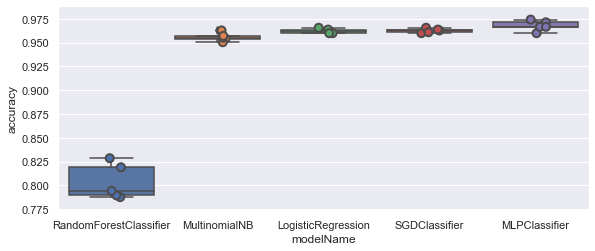

In [9]:
import seaborn as sns
sns.set(rc={ "figure.figsize": (9.5, 3.75) })

sns.boxplot(x="modelName", y="accuracy", data=crossValidateDataFrame)
sns.stripplot(x="modelName", y="accuracy", data=crossValidateDataFrame, size=8, jitter=True, edgecolor="gray", linewidth=2)

In [10]:
# Mean Accuracy of Each Algorithm
crossValidateDataFrame.groupby("modelName").accuracy.mean()

modelName
LogisticRegression        0.962286
MLPClassifier             0.967810
MultinomialNB             0.956000
RandomForestClassifier    0.803810
SGDClassifier             0.962667
Name: accuracy, dtype: float64

In [11]:
# Precision, Recall and F1 Score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

#For Each Algorithm 
accuracyList = []
for model in models:
    modelName = model.__class__.__name__

    #Split Data 
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, dataFrame.index, test_size=0.33, random_state=0)

    #Train Algorithm
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    
    accuracyList.append([modelName, precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')])

pd.DataFrame(accuracyList, columns=["Algorithm", "Precision", "Recall", "F1 Score"])

C:\Users\sheik\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,Algorithm,Precision,Recall,F1 Score
0,RandomForestClassifier,0.840193,0.823408,0.812721
1,MultinomialNB,0.955922,0.955708,0.955459
2,LogisticRegression,0.963087,0.962665,0.962834
3,SGDClassifier,0.964078,0.963329,0.963439
4,MLPClassifier,0.967904,0.967390,0.967584


## Model Fit Logistic Regression with 33% of Data randomly Chosen For Test

In [12]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0, solver="lbfgs")

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, dataFrame.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

C:\Users\sheik\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### Print Confusion Matrix in Test Data

Text(0.5, 10.203125, 'Predicted')

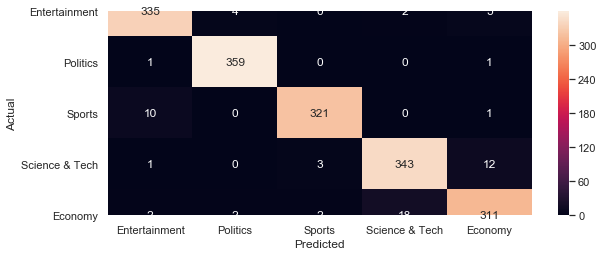

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=categoryIdDataFrame.Category.values, yticklabels=categoryIdDataFrame.Category.values)
plt.ylabel("Actual")
plt.xlabel("Predicted")

## Finally - Use All The Data to Train The Model and Save to Disk

In [14]:
# Fit The Model
model.fit(features, labels)

C:\Users\sheik\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.externals import joblib

# Save Model to Disk
joblib.dump(model, "TrainedData/Finalized Model.gz", compress=9)

# Save Category List to Disk
joblib.dump(idToCategory, "TrainedData/Category List.gz", compress=9)

# Save Fitted TFIDF to Disk
joblib.dump(TFIDFVectorizer, "TrainedData/Fitted TFIDF.gz", compress=9)

C:\Users\sheik\Miniconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['TrainedData/Fitted TFIDF.gz']